In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from statistics import median
import os
import glob
from IPython.display import Audio

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
%matplotlib inline

In [4]:
# collect all the wav files
files = glob.glob('./data/*.wav')

In [6]:
samp_rates = []
raw_sound_list = []
sound_list = []

In [7]:
# collect sampling frequencies and audio signals
for f in files:
    samp_rate, raw = wavfile.read(f)
    samp_rates.append(samp_rate)
    raw_sound_list.append(raw)

In [8]:
# resample all audio to median length
median_length = int(median([len(raw) for raw in raw_sound_list]))
sound_list = [signal.resample(raw, median_length) for raw in raw_sound_list]

In [9]:
# store as numpy array
audio_array = np.array(sound_list)

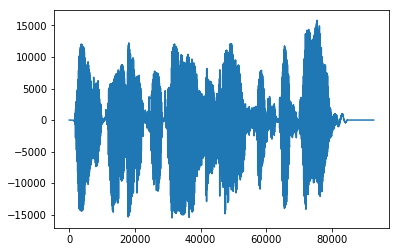

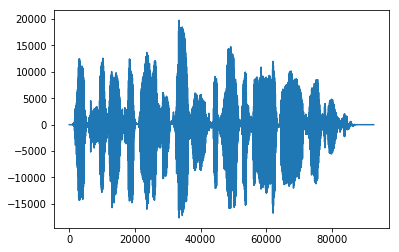

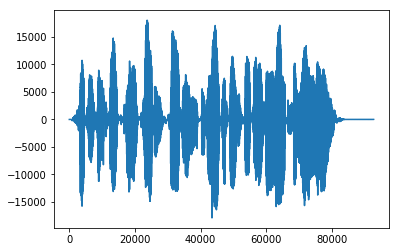

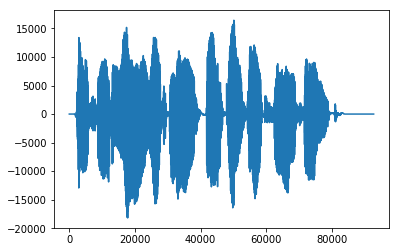

In [10]:
# listen and visualize sound waves as sanity check
for a in zip(samp_rates, sound_list):
    fig, ax = plt.subplots()
    ax.plot(a[1])
    Audio(a[1], rate=a[0])

In [11]:
# set random seed to get the same results every time - general good practice
np.random.seed(1)

In [12]:
# generate coefficient matrix to take linear combinations of audio for our mixed signals
coeff_mat = []
for i in enumerate(audio_array):
    a = np.random.choice(99,audio_array.shape[0]) + 1 # prevent any signals from not being represented at all
    a = a/(sum(a)+1)
    coeff_mat.append(a)
coeff_mat = np.array(coeff_mat)

In [13]:
# mix signals
mixed_signals = np.matmul(coeff_mat, audio_array)

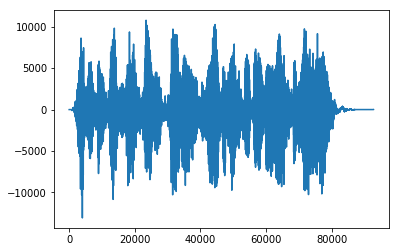

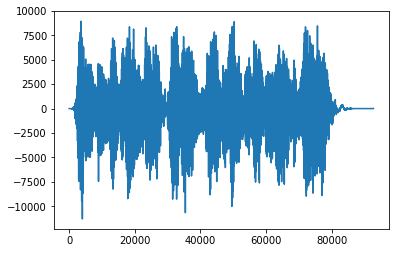

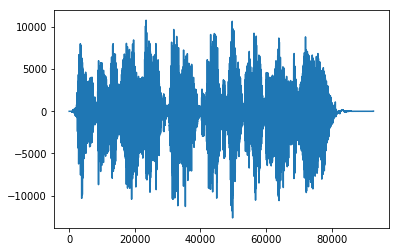

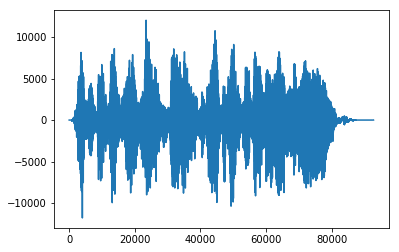

In [18]:
# listen to mixed signals and visualize sound waves as sanity check
for row in mixed_signals:
    fig, ax = plt.subplots()
    ax.plot(row)
    Audio(row, rate=24000)

In [15]:
# save data in subfolder of original data folder
if not os.path.exists('./data/mixed_data'):
    os.mkdir('./data/mixed_data')

In [16]:
for idx, row in enumerate(mixed_signals):
    wavfile.write(f'./data/mixed_data/{idx}.wav', rate=24000, data=row)